In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Training Time per epoch

In [2]:
# Load the CSV file into a DataFrame
# Assuming your CSV file is named 'training_times.csv'
df = pd.read_csv('epoch_time_log.csv', header=None, names=["Dataset", "Model", "Average Time Per Epoch"])
# Identify duplicate models for each dataset and rename them
df['Model'] = df.groupby(['Dataset', 'Model']).cumcount().add(1).astype(str).radd(df['Model'] + '_')


In [3]:
# Create the pivot table
pivot_table = df.pivot_table(index='Model', columns='Dataset', values=['Average Time Per Epoch'])
pivot_table = pivot_table.round(3)
print("Pivot Table:")
print(pivot_table)

Pivot Table:
             Average Time Per Epoch         
Dataset                    eurlex4k  wiki31k
Model                                       
Roberta_1                   223.792  273.773
bert-base_1                 254.657  212.810
distilbert_1                183.623  127.055
distilbert_2                134.678  161.937
xlnet_1                     893.269  797.404


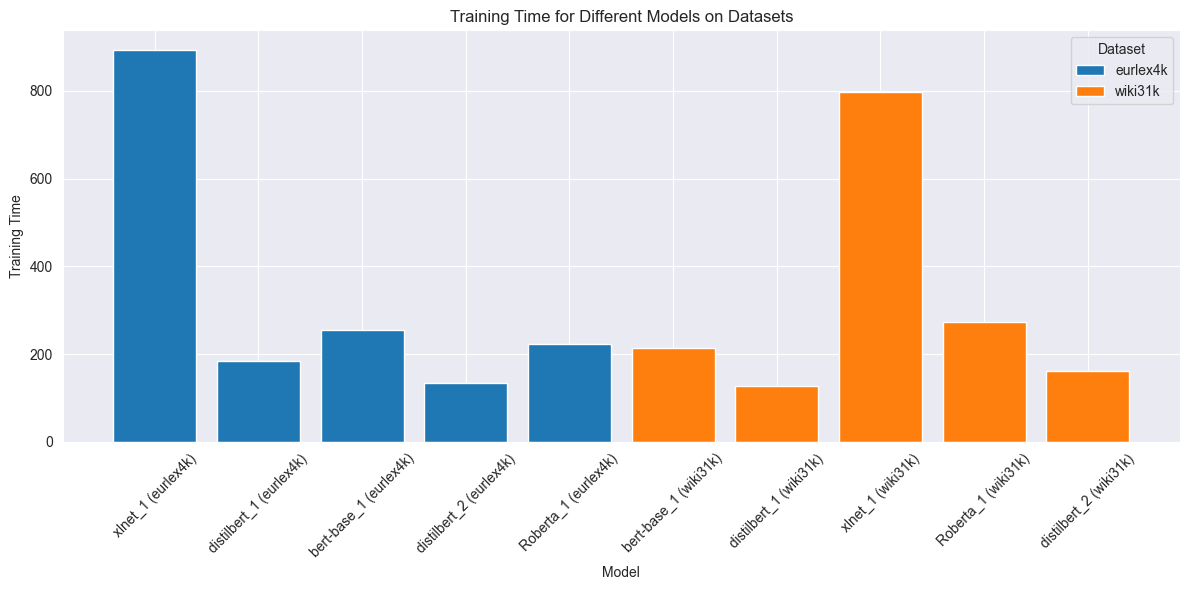

In [4]:
# Plotting the data
plt.figure(figsize=(12, 6))

# Bar plot for each model's training time on each dataset
for dataset in df['Dataset'].unique():
    subset = df[df['Dataset'] == dataset]
    plt.bar(subset['Model'] + " (" + dataset + ")", subset['Average Time Per Epoch'], label=dataset)

plt.xlabel('Model')
plt.ylabel('Training Time')
plt.title('Training Time for Different Models on Datasets')
plt.legend(title='Dataset')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

## Total Training Time

In [5]:
# Load the CSV file into a DataFrame
# Assuming your CSV file is named 'training_times.csv'
df = pd.read_csv('total_training_time_log.csv', header=None, names=["Dataset", "Model", "Training Time"])
# Identify duplicate models for each dataset and rename them
df['Model'] = df.groupby(['Dataset', 'Model']).cumcount().add(1).astype(str).radd(df['Model'] + '_')

In [6]:
# Create the pivot table
pivot_table = df.pivot_table(index='Model', columns='Dataset', values=['Training Time'])
pivot_table = pivot_table.round(3)
print("Pivot Table:")
print(pivot_table)

Pivot Table:
             Training Time           
Dataset           eurlex4k    wiki31k
Model                                
Roberta_1         6221.158  14216.220
bert-base_1       7957.559  11569.201
distilbert_1      6382.551   8387.589
distilbert_2      4921.295   9767.695
xlnet_1          25092.196  34355.732


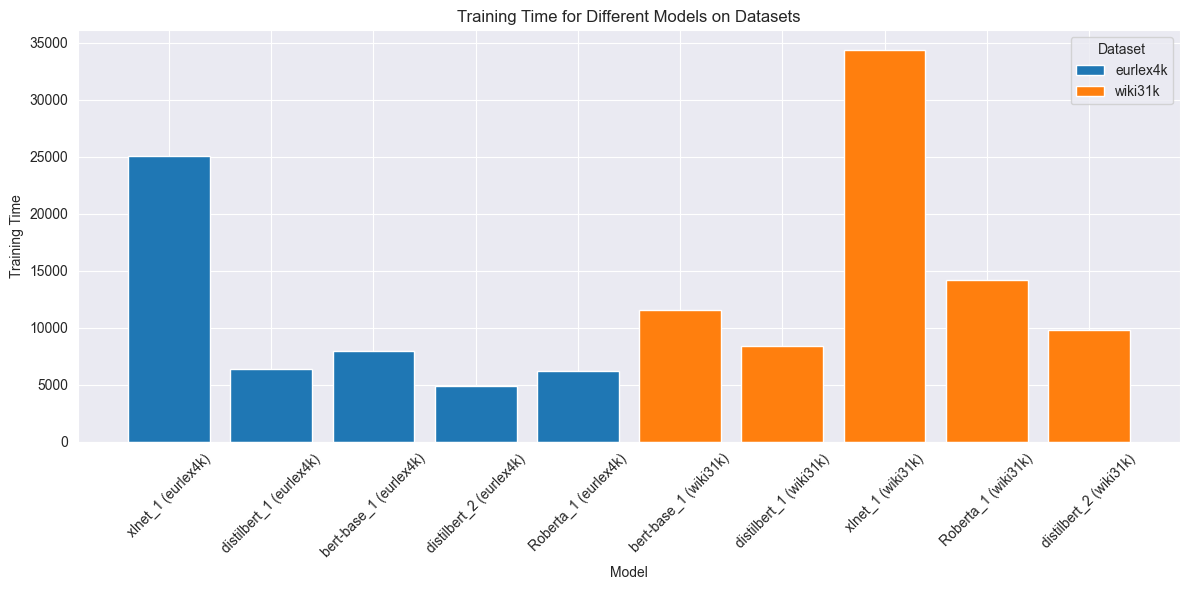

In [7]:

# Plotting the data
plt.figure(figsize=(12, 6))

# Bar plot for each model's training time on each dataset
for dataset in df['Dataset'].unique():
    subset = df[df['Dataset'] == dataset]
    plt.bar(subset['Model'] + " (" + dataset + ")", subset['Training Time'], label=dataset)

plt.xlabel('Model')
plt.ylabel('Training Time')
plt.title('Training Time for Different Models on Datasets')
plt.legend(title='Dataset')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

## Model prediction accuracy

In [8]:
df = pd.read_csv('final_evaluation_scores.csv')
# Identify duplicate models and rename them
df['bert_name'] = df.groupby(['dataset', 'bert_name']).cumcount().add(1).astype(str).radd(df['bert_name'] + '_')


In [9]:
# Create the pivot table
pivot_table = df.pivot_table(index='bert_name', columns='dataset', values=['p1', 'p3', 'p5'])
pivot_table = pivot_table.round(3)
print("Pivot Table:")
print(pivot_table)

Pivot Table:
                   p1               p3               p5        
dataset      eurlex4k wiki31k eurlex4k wiki31k eurlex4k wiki31k
bert_name                                                      
Roberta_1       0.862   0.878    0.739   0.772    0.621   0.682
bert-base_1     0.862   0.878    0.744   0.772    0.625   0.682
distilbert_1    0.864   0.880    0.740   0.768    0.617   0.673
distilbert_2    0.866   0.877    0.741   0.769    0.616   0.675
xlnet_1         0.859   0.866    0.741   0.762    0.620   0.673


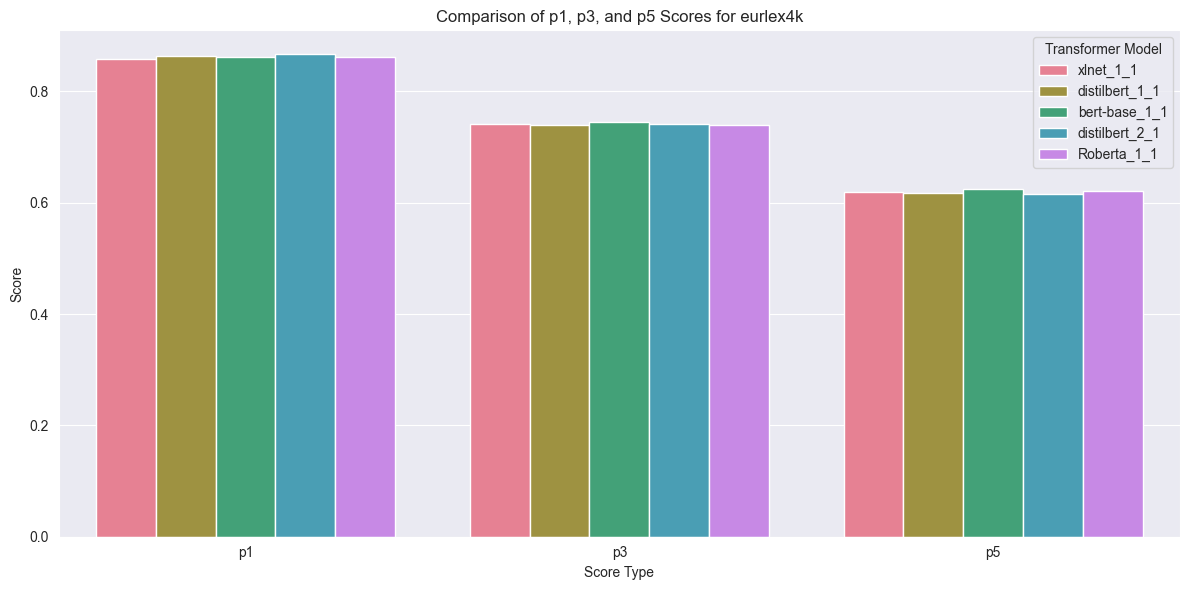

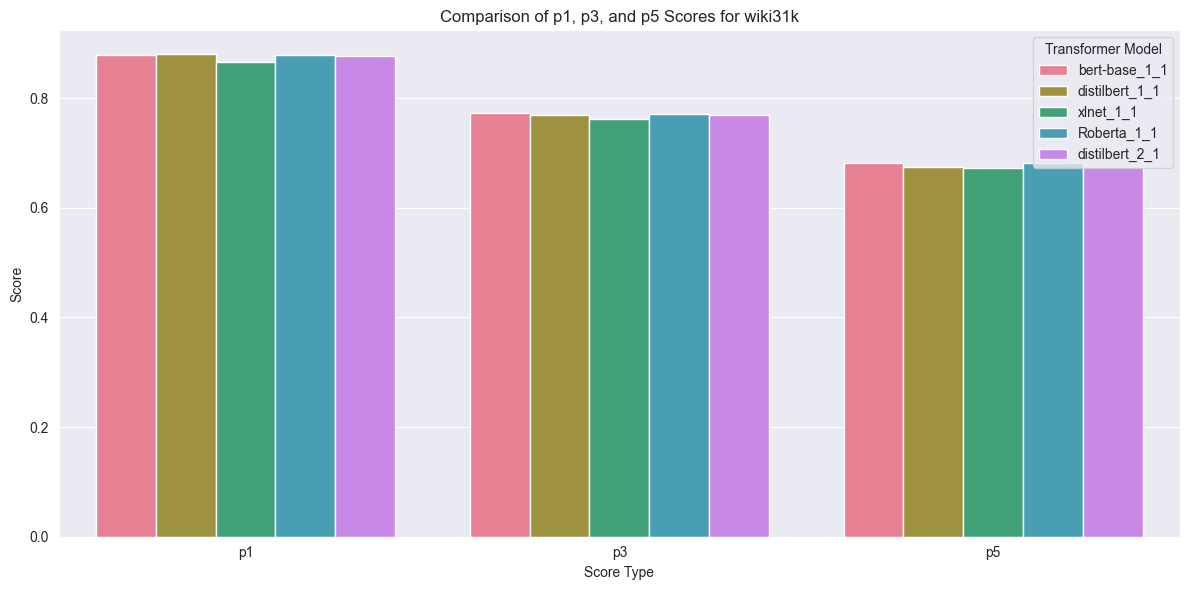

In [10]:
import seaborn as sns
# Identify duplicate models and rename them
df['bert_name'] = df.groupby(['dataset', 'bert_name']).cumcount().add(1).astype(str).radd(df['bert_name'] + '_')

# Plot separate bar charts for each dataset
datasets = df['dataset'].unique()

for dataset in datasets:
    plt.figure(figsize=(12, 6))
    
    subset = df[df['dataset'] == dataset]
    
    # Reshape the DataFrame for easier plotting
    subset_melted = subset.melt(id_vars=['bert_name'], value_vars=['p1', 'p3', 'p5'], 
                                var_name='Score Type', value_name='Score')
    
    sns.barplot(x='Score Type', y='Score', hue='bert_name', data=subset_melted, palette="husl")
    
    plt.title(f'Comparison of p1, p3, and p5 Scores for {dataset}')
    plt.xlabel('Score Type')
    plt.ylabel('Score')
    plt.xticks(rotation=0)
    plt.legend(title='Transformer Model')
    plt.tight_layout()
    plt.show()

## Model Stats

In [11]:
df = pd.read_csv("model_stats.csv")
# Create the pivot table
pivot_table = df.pivot_table(index='bert_name', values=['total_params', 'trainable_params', 'param_size_mb'], aggfunc='mean')

# Round the values to two decimal places
pivot_table = pivot_table.round(2)

print("Pivot Table:")
print(pivot_table)

Pivot Table:
            param_size_mb  total_params  trainable_params
bert_name                                                
Roberta            702.20   184077863.0       184077863.0
bert-base          673.28   176496167.0       176496167.0
distilbert         508.79   133376807.0       133376807.0
xlnet              700.88   183732263.0       183732263.0


## GPU Usage

In [12]:
df = pd.read_csv("gpu_usage_log.csv", header=None, names=["Dataset", "Transformer", "Avg. GPU Utilisation(%)", "Avg. Memory Utilisation(%)", "Avg. Memory Used (MB)", "Avg. Memory Free (MB)", "Avg. Power Draw (W)"])


In [13]:
df = df[['Dataset', 'Transformer', 'Avg. Memory Used (MB)', 'Avg. Power Draw (W)']]

In [14]:

# Create a pivot table
pivot_table = df.pivot_table(index='Transformer', columns='Dataset', 
                             values=["Avg. Memory Used (MB)", "Avg. Power Draw (W)"])

# Round the values to two decimal places
pivot_table = pivot_table.round(2)

# Display the pivot table
print("Pivot Table:")
print(pivot_table)


Pivot Table:
            Avg. Memory Used (MB)           Avg. Power Draw (W)        
Dataset                  eurlex4k   wiki31k            eurlex4k wiki31k
Transformer                                                            
Roberta                  12033.64  10812.51              131.01  114.87
bert-base                13265.56  12680.17              150.05  116.54
distilbert                7018.90   8359.03              122.16  112.76
xlnet                    12868.28  12774.86              135.64  133.96


## CPU Usage

In [15]:
# Load the CSV data into a DataFrame
df = pd.read_csv('cpu_memory_log.csv', header=None, names=['dataset', 'bert_name', 'timestamp', 'cpu_usage', 'memory_usage'])

# Convert the timestamp to a more readable datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

print(df.head())

    dataset bert_name                     timestamp  cpu_usage  memory_usage
0  eurlex4k     xlnet 2024-08-28 11:01:43.519390582       88.6          54.9
1  eurlex4k     xlnet 2024-08-28 11:17:30.055406570       48.5          55.9
2  eurlex4k     xlnet 2024-08-28 11:33:16.711333513       62.9          56.1
3  eurlex4k     xlnet 2024-08-28 11:49:00.622737169       50.2          56.0
4  eurlex4k     xlnet 2024-08-28 12:04:42.423712015       90.8          55.6


In [16]:
# Group by dataset and bert_name, and calculate mean, max, and min CPU and memory usage
agg_df = df.groupby(['dataset', 'bert_name']).agg({
    'cpu_usage': ['mean', 'max', 'min'],
    'memory_usage': ['mean', 'max', 'min']
}).reset_index()

print(agg_df)


    dataset   bert_name  cpu_usage             memory_usage            
                              mean   max   min         mean   max   min
0  eurlex4k   bert-base  68.060000  93.7  51.1    61.540000  62.6  60.3
1  eurlex4k  distilbert  71.404000  94.3  44.0    53.826000  65.2  48.7
2  eurlex4k     roberta  60.636000  85.6  40.0    62.872000  65.8  60.4
3  eurlex4k       xlnet  64.260000  90.8   3.0    65.668000  79.5  48.0
4   wiki31k     Roberta  65.634286  86.6  36.8    44.014286  54.9  37.4
5   wiki31k   bert-base  45.688571  80.1   3.1    55.880000  64.1  43.4
6   wiki31k  distilbert  28.035714  81.0   4.4    53.351429  61.3  49.0
7   wiki31k       xlnet  51.391429  81.2   5.9    57.797143  67.3  49.5
